In [107]:
%reset

In [108]:
import sys
from pathlib import Path

# Path to the folder that contains aegis.py,
# assuming your notebook lives in <parent>/notebooks/
# and aegis.py lives in  <parent>/aegis_folder/
package_path = Path.cwd().parent / "DGRB"

# Prepend it so it wins over any other packages named 'aegis'
sys.path.insert(0, str(package_path))

In [109]:
import aegis
import numpy as np
import healpy as hp
import torch
import pickle as pk
from astropy import units as u
from astropy import constants as c
import matplotlib.pyplot as plt
from os import listdir
import os
import sys
from sbi.inference import SNLE, SNPE#, prepare_for_sbi, simulate_for_sbi
from sbi import utils as utils
from sbi import analysis as analysis
# from sbi.inference.base import infer
from getdist import plots, MCSamples
import pickle
from scipy.stats import norm
from scipy.integrate import quad, simpson
from joblib import Parallel, delayed

%matplotlib inline

All 4 source classes

In [110]:
# with open('/home/users/ids29/DGRB/photon_info_list.pkl', 'rb') as f:
#     photon_info_list = pickle.load(f)

# thetas = torch.load('/home/users/ids29/DGRB/thetas.pt')

# with open('/home/users/ids29/DGRB/obs_photon_info.pkl', 'rb') as f:
#     obs_photon_info = pickle.load(f)

# input_params = torch.load('/home/users/ids29/DGRB/input_params.pt')

# # Define the prior using sbi.utils.BoxUniform
# parameter_range = torch.load('/home/users/ids29/DGRB/parameter_range.pt')

# prior = utils.BoxUniform(low=parameter_range[0], high=parameter_range[1])

SFG #1 & SFG #2

In [111]:
# with open('/home/users/ids29/DGRB Scripts/training_photon_info_list_2SFGs.pkl', 'rb') as f:
#     photon_info_list = pickle.load(f)

# theta_train = torch.load('/home/users/ids29/DGRB Scripts/thetas_2SFGs.pt')

# with open('/home/users/ids29/DGRB Scripts/test_photon_info_2SFGs.pkl', 'rb') as f:
#     test_photon_info = pickle.load(f)

# theta_test = torch.load('/home/users/ids29/DGRB Scripts/input_params_2SFGs.pt')

# # Define the prior using sbi.utils.BoxUniform
# parameter_range = torch.load('/home/users/ids29/DGRB Scripts/parameter_range_2SFGs.pt')

# prior = utils.BoxUniform(low=parameter_range[0], high=parameter_range[1])

SFG#1 & mAGN with same spectra

In [128]:
with open('/home/users/ids29/DGRB Scripts/training_photon_info_list_1SFG_1mAGN.pkl', 'rb') as f:
    photon_info_list = pickle.load(f)

theta_train = torch.load('/home/users/ids29/DGRB Scripts/thetas_1SFG_1mAGN.pt')

with open('/home/users/ids29/DGRB Scripts/test_photon_info_1SFG_1mAGN_part1.pkl', 'rb') as f:
    test_photon_info_1 = pickle.load(f)
with open('/home/users/ids29/DGRB Scripts/test_photon_info_1SFG_1mAGN_part2.pkl', 'rb') as f:
    test_photon_info_2 = pickle.load(f)

theta_test_1 = torch.load('/home/users/ids29/DGRB Scripts/test_params_1SFG_1mAGN_part1.pt')
theta_test_2 = torch.load('/home/users/ids29/DGRB Scripts/test_params_1SFG_1mAGN_part2.pt')

# Define the prior using sbi.utils.BoxUniform
parameter_range = torch.load('/home/users/ids29/DGRB Scripts/parameter_range_1SFG_1mAGN.pt')

prior = utils.BoxUniform(low=parameter_range[0], high=parameter_range[1])

/tmp/ipykernel_769621/1669926398.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  theta_train = torch.load('/home/users/ids29/DGRB Scripts/thetas_1SFG_1mAGN.pt')
/tmp/ipy

All four source classes but with different observation data

In [114]:
# with open('/home/users/ids29/DGRB/photon_info_list.pkl', 'rb') as f:
#     photon_info_list = pickle.load(f)

# thetas = torch.load('/home/users/ids29/DGRB/thetas.pt')

# with open('/home/users/ids29/DGRB/obs_photon_info_test.pkl', 'rb') as f:
#     obs_photon_info = pickle.load(f)

# input_params = torch.load('/home/users/ids29/DGRB/input_params_test.pt')

# # Define the prior using sbi.utils.BoxUniform
# parameter_range = torch.load('/home/users/ids29/DGRB/parameter_range.pt')

# prior = utils.BoxUniform(low=parameter_range[0], high=parameter_range[1])

Poisson Model

In [115]:
# with open('/home/users/ids29/DGRB Scripts/training_photon_info_list_Poisson_SFG1.pkl', 'rb') as f:
#     photon_info_list = pickle.load(f)

# theta_train = torch.load('/home/users/ids29/DGRB Scripts/thetas_Poisson_SFG1.pt')

# with open('/home/users/ids29/DGRB Scripts/test_photon_info_Poisson_SFG1.pkl', 'rb') as f:
#     test_photon_info = pickle.load(f)

# theta_test = torch.load('/home/users/ids29/DGRB Scripts/input_params_Poisson_SFG1.pt')

# # Define the prior using sbi.utils.BoxUniform
# parameter_range = torch.load('/home/users/ids29/DGRB Scripts/parameter_range_Poisson_SFG1.pt')

# prior = utils.BoxUniform(low=parameter_range[0], high=parameter_range[1])

In [ ]:
# parameter_range = [[], []]
abundance_luminosity_and_spectrum_list = []
source_class_list = []
parameter_names = []
energy_range = [1000, 100000] #MeV
energy_range_gen = [energy_range[0]*0.5, energy_range[1]*18]
max_radius = 8.5 + 20*2 #kpc
exposure = 2000*10*0.2 #cm^2 yr
flux_cut = 1e-9 #photons/cm^2/s
angular_cut = np.pi #10*u.deg.to('rad') #degrees
angular_cut_gen = np.pi #angular_cut*1.5
lat_cut = 0 #2*u.deg.to('rad') #degrees
lat_cut_gen = lat_cut*0.5

In [117]:
my_cosmology = 'Planck18'
z_range = [0, 14]
luminosity_range = 10.0**np.array([37, 50]) # Minimum value set by considering Andromeda distance using Fermi as benchmark and receiving 0.1 photon at detector side
my_AEGIS = aegis.aegis(abundance_luminosity_and_spectrum_list, source_class_list, parameter_range, energy_range, luminosity_range, max_radius, exposure, angular_cut, lat_cut, flux_cut, energy_range_gen=energy_range_gen, cosmology = my_cosmology, z_range = z_range, verbose = False)
my_AEGIS.angular_cut_gen, my_AEGIS.lat_cut_gen = angular_cut_gen, lat_cut_gen

In [118]:
def compute_moments(energies):
    """Compute the mean and variance of the energies."""
    mean_E = np.mean(energies)
    var_E = np.var(energies)
    return mean_E, var_E

def compute_quantiles(energies, quantiles=[10, 25, 50, 75, 90]):
    """
    Compute the specified quantiles (in percent).
    For example, the 25th quantile is the energy such that 25% of the data lies below it.
    Returns a dictionary mapping percentiles to values.
    """
    q_values = np.percentile(energies, quantiles)
    return dict(zip(quantiles, q_values))

def normalize_quantiles(q_dict, E_min, E_max):
    """
    Normalize quantile values from a dictionary using min-max normalization.
    """
    norm_q = {perc: (val - E_min) / (E_max - E_min) for perc, val in q_dict.items()}
    return norm_q




def effective_spectral_index(energies, E_lower):
    """
    Compute effective spectral index via MLE.
    Returns np.nan if there are no photons.
    """
    energies = np.array(energies)
    n = len(energies)
    if n == 0:
        return np.nan
    sum_logs = np.sum(np.log(energies / E_lower))
    return 1 + n / sum_logs

def smooth_binned_gamma(binned_gamma, counts, global_gamma, min_count=6):
    """
    Smooth binned effective spectral indices if the count in a bin is low.
    
    Parameters:
      binned_gamma : array-like
          Array of spectral indices per energy bin (may contain np.nan for empty bins).
      counts : array-like
          Array of photon counts per bin.
      global_gamma : float
          Global effective spectral index, used as fallback.
      min_count : int
          Minimum photon count required to trust a bin.
    
    Returns:
      smoothed_gamma : numpy array with smoothed spectral index values.
    """
    binned_gamma = np.array(binned_gamma)
    counts = np.array(counts)
    num_bins = len(binned_gamma)
    smoothed_gamma = binned_gamma.copy()

    # Loop over each bin.
    for i in range(num_bins):
        if counts[i] < min_count or np.isnan(binned_gamma[i]):
            indices = [i]
            if i > 0:
                indices.append(i-1)
            if i < num_bins - 1:
                indices.append(i+1)
            indices = list(set(indices))  # ensure uniqueness
            
            # Only include indices with non-NaN values
            valid_indices = [j for j in indices if not np.isnan(binned_gamma[j])]
            if valid_indices:
                # Use the counts as weights. If any count is zero, it's fine; it will reduce the weight.
                weights = np.array([counts[j] for j in valid_indices], dtype=np.float32)
                # If all weights sum to 0, default to global_gamma.
                if np.sum(weights) > 0:
                    smoothed_gamma[i] = np.average(binned_gamma[valid_indices], weights=weights)
                else:
                    smoothed_gamma[i] = global_gamma
            else:
                # If none of the neighboring bins have a valid estimate, fallback to global_gamma.
                smoothed_gamma[i] = global_gamma
    return smoothed_gamma

def compute_binned_effective_spectral_indices(energies, num_bins, energy_range):
    """
    Divide the energy range into logarithmic bins and compute the effective spectral index in each bin.
    For bins with few photons (count < min_count) or empty bins, apply smoothing by averaging with neighboring bins.
    
    Returns:
      smoothed_gamma : 1D array containing the (possibly smoothed) spectral index for each bin.
      global_gamma  : Effective spectral index computed using all energies (with the lowest bin edge as E_lower).
      counts        : Raw photon counts per bin.
    """
    bins = np.geomspace(energy_range[0], energy_range[1], num_bins + 1)
    binned_gamma = []
    counts = []  # photon counts per bin

    # Loop over bins
    for i in range(len(bins) - 1):
        mask = (energies >= bins[i]) & (energies < bins[i+1])
        energies_bin = energies[mask]
        counts.append(len(energies_bin))
        # Compute gamma for the bin; if the bin is empty, effective_spectral_index returns np.nan.
        gamma = effective_spectral_index(energies_bin, E_lower=bins[i])
        binned_gamma.append(gamma)
    
    binned_gamma = np.array(binned_gamma)
    counts = np.array(counts)
    
    # Compute the global effective spectral index over all energies using the first bin's lower edge.
    global_gamma = effective_spectral_index(energies, E_lower=bins[0])
    
    # Smooth the binned_gamma using neighboring bins if counts in a bin are low.
    smoothed_gamma = smooth_binned_gamma(binned_gamma, counts, global_gamma, min_count=6)
    
    return smoothed_gamma, global_gamma, counts




def normalize_binned_gamma(binned_gamma, global_gamma, mode='ratio'):
    """
    Normalize the binned effective spectral indices relative to the global effective spectral index.
    
    Parameters:
      binned_gamma : np.array
          Array of effective spectral indices for each energy bin.
      global_gamma : float
          The global effective spectral index computed over the entire energy range.
      mode : str, optional
          'ratio' for normalized_binned_gamma = binned_gamma / global_gamma,
          'difference' for normalized_binned_gamma = (binned_gamma - global_gamma)/global_gamma.
          Default is 'ratio'.
    
    Returns:
      normalized_binned_gamma : np.array
    """
    if mode == 'ratio':
        # Return ratio relative to global spectral index
        normalized_binned_gamma = binned_gamma / global_gamma
    elif mode == 'difference':
        # Return relative differences with baseline 0
        normalized_binned_gamma = (binned_gamma - global_gamma) / global_gamma
    else:
        raise ValueError("Unknown mode for normalization. Choose 'ratio' or 'difference'.")
    return normalized_binned_gamma

def normalize_energy_only_hist(energy_only_hist):
    """
    Normalize a 1D histogram so it sums to 1.
    """
    total = np.sum(energy_only_hist) # this is the total number of photons in the energy-only histogram
    if total == 0:
        return energy_only_hist  # or handle the zero-case as needed
    return energy_only_hist / total

def compute_summary_statistics(energies, N_Ebins):
    """
    Given an array of photon energies (all between 2 and 100 GeV), compute a set of summary statistics:
      1. Mean energy.
      2. Variance of energy.
      3. Quantiles: 10%, 25%, 50%, 75%, and 90%.
      NOT DOING: 4. The fraction of photons with energy above E_cross (where E_cross is the crossing point
         for the two normalized PDFs of the Gamma = 2.2 and Gamma = 2.25 spectra).
      5. Effective spectral index estimated from the data.
      
    Returns the statistics in a dictionary and also a flattened torch tensor.
    """
    # 1. Mean and variance
    mean_E, var_E = compute_moments(energies)
    
    # 2. Quantiles
    quant_dict = compute_quantiles(energies)  # This returns a dict like {10: val, 25: val, ...}
    norm_quant_dict = normalize_quantiles(quant_dict, E_min=energy_range[0], E_max=energy_range[1])

    # energy_only_hist = compute_energy_only_histogram(energies, num_bins=N_Ebins, energy_range=energy_range)

    binned_gamma, global_gamma, energy_only_hist = compute_binned_effective_spectral_indices(energies, num_bins=N_Ebins, energy_range=energy_range)
    norm_binned_gamma = normalize_binned_gamma(binned_gamma, global_gamma, mode='ratio')
    norm_energy_only_hist = normalize_energy_only_hist(energy_only_hist)
    
    # If you want to pass the summary statistic to sbi, it is best to use a fixed-size vector (e.g., a torch tensor).
    # For example, arrange the stats in a consistent order:
    scalars  = np.array([
        energies.size, # total number of photons
        mean_E,
        var_E,
        global_gamma
    ], dtype=np.float32)

    
    return scalars, norm_quant_dict, norm_binned_gamma, norm_energy_only_hist

def normalize_energy_dependent_hist(energy_dependent_hist, total_pixels):
    """
    Normalize a 2D histogram so that each column sums to 1.
    total_pixels: the fixed number of pixels (for example, len(roi_pix_i))
    """
    # If the histogram is of shape (N_countbins, N_Ebins),
    # each column should ideally sum to total_pixels.
    normalized_hist = energy_dependent_hist / total_pixels
    return normalized_hist

In [119]:
# a simple simulator with the total number of photons as the summary statistic
def simulator(photon_info):

    N_side = 2**6
    #parameters for the summary statistic
    
    center_mask = 10 #deg 
    lat_mask = 5 #deg 
    N_Ebins = 20
    Ebinspace = 'log'#'linear'
    N_countbins = 10
    countbinspace = 'custom'#'linear'
    if N_side == 2**6:
        mincount, maxcount = 0, 150
    elif N_side == 2**3:
        mincount, maxcount = 0, 5500
    N_pix = 12*N_side**2
    pix_i = np.linspace(0, N_pix-1, N_pix, dtype = 'int')
    roi_pix_i = np.where(np.logical_and(hp.rotator.angdist(np.array([np.pi/2, 0]), hp.pix2ang(N_side, pix_i)) >= center_mask*u.deg.to('rad'), np.abs(np.pi/2 - hp.pix2ang(N_side, pix_i)[0]) >= lat_mask*u.deg.to('rad')))[0]

    roi_map = my_AEGIS.get_roi_map_summary(photon_info = photon_info, N_side = N_side, N_Ebins = N_Ebins, Ebinspace = Ebinspace, roi_pix_i = roi_pix_i)
    energy_dependent_hist = my_AEGIS.get_counts_histogram_from_roi_map(roi_map, mincount = mincount, maxcount = maxcount, N_countbins = N_countbins, countbinspace = countbinspace)
    total_pixels = roi_pix_i.size
    norm_energy_dependent_hist = normalize_energy_dependent_hist(energy_dependent_hist, total_pixels)

    photon_pixels = hp.ang2pix(N_side, photon_info['angles'][:, 0], photon_info['angles'][:, 1])
    roi_mask = np.isin(photon_pixels, roi_pix_i)
    energies_in_roi = photon_info['energies'][roi_mask]


    unnorm_scalars, norm_quant_dict, norm_binned_gamma, norm_energy_only_hist = compute_summary_statistics(energies_in_roi, N_Ebins = N_Ebins)
    
    return unnorm_scalars, norm_quant_dict, norm_binned_gamma, norm_energy_only_hist, norm_energy_dependent_hist

In [120]:
# --- Helper function to process a single simulation ---
def process_simulation(photon_info):
    """
    Process one simulation's photon_info and return a dictionary with sub-statistics.
    It calls your modified simulator() function.
    """
    # Call your simulator that returns sub-statistics:
    # unnorm_scalars: 1D numpy array (global scalar features, NOT normalized)
    # norm_quant_dict: dict of normalized quantiles (keys, e.g., 10,25,50,75,90)
    # norm_binned_gamma: normalized 1D array, one element per energy bin
    # norm_energy_only_hist: normalized 1D energy-only histogram
    # norm_energy_dependent_hist: normalized 2D array (we will flatten it)
    unnorm_scalars, norm_quant_dict, norm_binned_gamma, norm_energy_only_hist, norm_energy_dependent_hist = simulator(photon_info)
    
    # Convert the normalized quantiles dictionary into a vector.
    # We sort the keys so that the order is fixed.
    sorted_keys = sorted(norm_quant_dict.keys())
    norm_quant_vector = np.array([norm_quant_dict[k] for k in sorted_keys], dtype=np.float32)
    
    # Flatten the 2D energy-dependent histogram.
    flat_energy_dependent_hist = np.asarray(norm_energy_dependent_hist, dtype=np.float32).flatten()
    
    # Package the sub-statistics into a dictionary.
    return {
        "scalars": unnorm_scalars,                  # 1D array (e.g., shape (D_scalar,))
        "norm_quant": norm_quant_vector,            # 1D array (e.g., 5 elements)
        "binned_gamma": norm_binned_gamma,          # 1D array (num_energy_bins,)
        "energy_only_hist": norm_energy_only_hist,   # 1D array (num_energy_bins,)
        "energy_dependent_hist": flat_energy_dependent_hist  # 1D flattened array
    }

# --- Run the processing in parallel over all simulations ---
num_workers = -1  # or your chosen parallel worker count
results = Parallel(n_jobs=num_workers)(
    delayed(process_simulation)(photon_info) for photon_info in photon_info_list
)

# --- Extract the unnormalized global scalars from all simulations ---
scalars_list = [res["scalars"] for res in results]  # List of arrays, one per simulation

# Stack them to form a 2D array: shape (num_simulations, D_scalar)
scalars_all = np.stack(scalars_list, axis=0)

# Compute per-element mean and std over the training simulations
scalars_mean = np.mean(scalars_all, axis=0)
scalars_std = np.std(scalars_all, axis=0)
# Prevent division by zero
scalars_std[scalars_std == 0] = 1.0

# --- Apply z-normalization to the global scalars for each simulation ---
normalized_scalars_list = [(s - scalars_mean) / scalars_std for s in scalars_list]

# --- Now, build the final overall summary vector for each simulation ---
# The design here is to concatenate, for each simulation:
# [normalized_scalars, norm_quant_vector, binned_gamma, energy_only_hist, flattened energy_dependent_hist]
final_summary_list = []
for i, res in enumerate(results):
    final_vector = np.concatenate([
        normalized_scalars_list[i],     # Normalized global scalars
        res["norm_quant"],              # Normalized quantiles (fixed order)
        res["binned_gamma"],            # Normalized binned spectral indices (1D)
        res["energy_only_hist"],        # Normalized energy-only histogram (1D)
        res["energy_dependent_hist"]    # Flattened normalized 2D energy-dependent histogram
    ])
    final_summary_list.append(final_vector.astype(np.float32))

# Stack all simulation summaries into a 2D array
final_summary_array = np.stack(final_summary_list, axis=0)  # Shape: (num_simulations, final_vector_dim)

# Convert the overall summary statistics to a torch tensor for sbi usage
summary_tensor_train = torch.tensor(final_summary_array, dtype=torch.float32)

Observation - actual data

In [157]:
# Call your simulator function on obs_photon_info to get the sub-statistics.
unnorm_scalars_obs, norm_quant_dict_obs, norm_binned_gamma_obs, norm_energy_only_hist_obs, norm_energy_dependent_hist_obs = simulator(test_photon_info_2)

# 1. Normalize the global scalar features using the training set parameters.
#    It is assumed that unnorm_scalars_obs is a 1D NumPy array.
norm_scalars_obs = (unnorm_scalars_obs - scalars_mean) / scalars_std

# 2. Process the quantiles dictionary.
#    Sorting keys ensures a consistent ordering (e.g., [10, 25, 50, 75, 90]).
sorted_keys = sorted(norm_quant_dict_obs.keys())
norm_quant_vector_obs = np.array([norm_quant_dict_obs[k] for k in sorted_keys], dtype=np.float32)

# 3. Flatten the normalized 2D energy-dependent histogram.
flat_energy_dependent_hist_obs = np.asarray(norm_energy_dependent_hist_obs, dtype=np.float32).flatten()

# 4. Now, form the overall summary statistic in a fixed, consistent order.
# For example, we concatenate in the following order:
# [z-normalized scalars, normalized quantiles vector, normalized binned gamma, normalized energy-only histogram, flattened energy-dependent histogram]
overall_summary_vector_obs = np.concatenate([
    norm_scalars_obs,           # Global scalar features (z-normalized)
    norm_quant_vector_obs,      # Normalized quantiles as a fixed-order vector
    norm_binned_gamma_obs,      # Normalized effective spectral indices per energy bin
    norm_energy_only_hist_obs,  # Normalized energy-only histogram (1D)
    flat_energy_dependent_hist_obs  # Flattened normalized 2D energy-dependent histogram
])

# 5. Convert the overall summary vector into a torch tensor.
summary_tensor_test = torch.tensor(overall_summary_vector_obs, dtype=torch.float32)


In [158]:
x_train = summary_tensor_train
theta_train = theta_train

x_test = summary_tensor_test
theta_test = theta_test_1

SBI v0.24.0 | θ=(1000, 2), x=(1000, 249)
 Neural network successfully converged after 68 epochs.
        -------------------------
        ||||| ROUND 1 STATS |||||:
        -------------------------
        Epochs trained: 68
        Best validation performance: 2.0444
        -------------------------
        
Training finished (early-stopped or max_epochs reached)


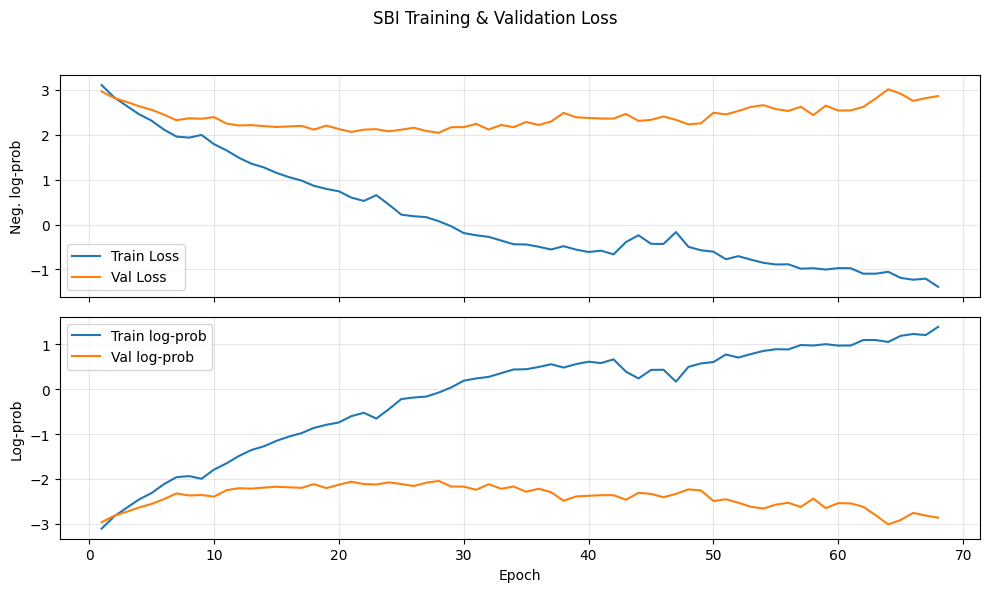

In [165]:
#!/usr/bin/env python3
import torch
import numpy as np
import matplotlib.pyplot as plt
from sbi.inference import SNPE
from sbi.neural_nets import posterior_nn
import sbi

def plot_losses(train_losses, val_losses):
    """Plot training vs validation negative log-prob and log-prob curves."""
    epochs = np.arange(1, len(train_losses) + 1)
    neg_train = -np.array(train_losses)
    neg_val = -np.array(val_losses)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
    ax1.plot(epochs, train_losses, label="Train Loss")
    ax1.plot(epochs, val_losses, label="Val Loss")
    ax1.set_ylabel("Neg. log-prob")
    ax1.legend(), ax1.grid(alpha=0.3)

    ax2.plot(epochs, neg_train, label="Train log-prob")
    ax2.plot(epochs, neg_val, label="Val log-prob")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Log-prob")
    ax2.legend(), ax2.grid(alpha=0.3)

    fig.suptitle("SBI Training & Validation Loss")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def train_sbi_nsf(
    prior,
    theta_train,
    x_train,
    hidden_features=250,
    num_transforms=10,
    num_bins=20,
    num_components=15,
    dropout=0.25,
    batch_norm=True,
    batch_size=64,
    lr=5e-5,
    val_frac=0.2,
    patience=50,
    max_epochs=1000,
    ensemble_size=1,
):
    """
    Train SBI-SNPE NSF model on provided tensors without I/O or disk saves.

    Returns trained inference object and density estimator.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    torch.manual_seed(42)
    theta_train = theta_train.to(device)
    x_train = x_train.to(device)
    print(f"SBI v{sbi.__version__} | θ={tuple(theta_train.shape)}, x={tuple(x_train.shape)}")

    # Drop near-constant dims
    low_var = (x_train.std(0) < 1e-6).sum().item()
    if low_var:
        print(f"Warning: {low_var} dims nearly zero variance")

    # No dimensionality reduction: use full observation x_train
    x_used = x_train

    # Build NSF flow
    flow_builder = posterior_nn(
        model="nsf",
        hidden_features=hidden_features,
        num_transforms=num_transforms,
        num_bins=num_bins,
        num_components=num_components,
        dropout_probability=dropout,
        batch_norm=batch_norm,
        z_score_x="independent",
        z_score_theta="independent",
    )

    inf = SNPE(prior=prior, density_estimator=flow_builder)
    inf.append_simulations(theta=theta_train, x=x_used)

    train_kwargs = dict(
        training_batch_size=batch_size,
        learning_rate=lr,
        validation_fraction=val_frac,
        stop_after_epochs=patience,
        max_num_epochs=max_epochs,
        clip_max_norm=1.0,
        show_train_summary=True,
        num_atoms=10,
        # Removed 'optimizer_kwargs' to prevent TypeError
    )

    de = inf.train(**train_kwargs)
    print("Training finished (early-stopped or max_epochs reached)")

    # Plot losses
    hist = inf._summary
    plot_losses(hist['training_loss'], hist['validation_loss'])

    return inf, de



if __name__ == "__main__":
    # Provide prior, theta_train, x_train before running
    inf, de = train_sbi_nsf(
        prior,
        theta_train,
        x_train,
        hidden_features=150,     # Smaller model
        num_transforms=5,
        num_bins=15,
        num_components=5,
        lr=2e-4,
        batch_size=64,
        patience=40
    )


All four source classes

In [124]:
# parameter_names = ['SFG1', 'SFG2', 'SFG3', 'mAGN']
# parameter_labels = [r'\log(\Phi_{SFG1}^\star)', r'\log(\Phi_{SFG2}^\star)', r'\log(\Phi_{SFG3}^\star)', r'\log(\phi_1)']
# samples = posterior.sample((int(1e5),), x=observation) #100000
# ranges = dict(zip(parameter_names, np.array(parameter_range).T.reshape((np.array(parameter_range[0]).size,2))))
# mcsamples = MCSamples(samples=samples.numpy(), names = parameter_names, labels = parameter_labels, ranges = ranges)

# g = plots.get_subplot_plotter()
# g.settings.title_limit_fontsize = 16 # reference size for 3.5 inch subplot
# g.settings.axes_fontsize=18
# g.settings.legend_fontsize = 26
# g.settings.axes_labelsize = 22
# g.settings.norm_1d_density = True
# g.settings.title_limit = 1
# # g.triangle_plot(mcsamples, filled=True, markers=input_params.numpy(), param_limits=ranges)
# markers = input_params.numpy().flatten()  # Converts shape (1,2) to (2,)
# g.triangle_plot(mcsamples, filled=True, markers=markers, param_limits=ranges)

SFG#1 and SFG#2 classes

In [125]:
# parameter_names = ['SFG1', 'SFG2']
# parameter_labels = [r'\log(\Phi_{SFG1}^\star)', r'\log(\Phi_{SFG2}^\star)']
# samples = posterior.sample((int(1e5),), x=x_test) #100000
# ranges = dict(zip(parameter_names, np.array(parameter_range).T.reshape((np.array(parameter_range[0]).size,2))))
# mcsamples = MCSamples(samples=samples.numpy(), names = parameter_names, labels = parameter_labels, ranges = ranges)

# g = plots.get_subplot_plotter()
# g.settings.title_limit_fontsize = 16 # reference size for 3.5 inch subplot
# g.settings.axes_fontsize=18
# g.settings.legend_fontsize = 26
# g.settings.axes_labelsize = 22
# g.settings.norm_1d_density = True
# g.settings.title_limit = 1
# # g.triangle_plot(mcsamples, filled=True, markers=input_params.numpy(), param_limits=ranges)
# markers = theta_test.numpy().flatten()  # Converts shape (1,2) to (2,)
# g.triangle_plot(mcsamples, filled=True, markers=markers, param_limits=ranges)

SFG#1 and mAGN classes with same spectra

Drawing 1000000 posterior samples:   0%|          | 0/1000000 [00:00<?, ?it/s]

Removed no burn in


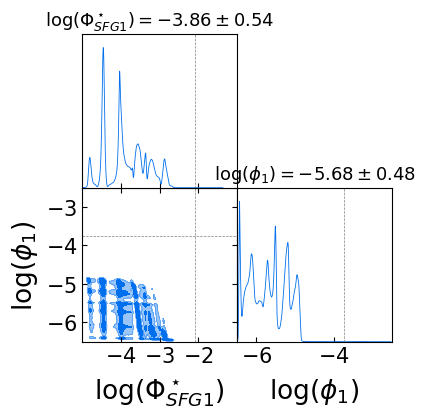

In [163]:
#!/usr/bin/env python3
import torch
import numpy as np
import matplotlib.pyplot as plt
from getdist import MCSamples, plots

def main(
    inf,
    de,
    x_test,
    theta_test,
    parameter_names,
    parameter_labels,
    parameter_range,
    n_samples=100_000,
):
    """
    Compute posterior samples with SNPE (no PCA) and plot a GetDist triangle plot.

    Parameters
    ----------
    inf, de : trained SNPE inference object and density estimator
    x_test   : torch.Tensor of shape (D_x,) or (1, D_x)
    theta_test : torch.Tensor of shape (D_theta,)
    parameter_names  : list of str, length D_theta
    parameter_labels : list of str, length D_theta
    parameter_range  : torch.Tensor shape (2, D_theta) or list of lists
    n_samples : int, number of posterior draws
    """
    # 1. Prepare test observation (no PCA)
    # Ensure x_test is 1d of shape (D_x,)
    x = x_test.detach().cpu()
    if x.ndim == 2 and x.shape[0] == 1:
        x = x.squeeze(0)

    # 2. Build & sample the amortized posterior
    posterior = inf.build_posterior(de)
    posterior.set_default_x(x)
    # For sampling with a single observation:
    samples = posterior.sample((n_samples,))  # returns [n_samples, D_theta]
    samples_np = samples.detach().cpu().numpy()

    # 3. Fix up parameter_range orientation
    pr = (
        parameter_range.detach().cpu().numpy()
        if isinstance(parameter_range, torch.Tensor)
        else np.array(parameter_range)
    )
    if pr.shape == (2, len(parameter_names)):
        param_ranges = list(zip(pr[0, :], pr[1, :]))
    elif pr.shape == (len(parameter_names), 2):
        param_ranges = [tuple(row) for row in pr]
    else:
        raise ValueError(f"Unexpected parameter_range shape {pr.shape}")

    ranges = dict(zip(parameter_names, param_ranges))

    # 4. Wrap samples in GetDist and plot
    mcs = MCSamples(
        samples=samples_np,
        names=parameter_names,
        labels=parameter_labels,
        ranges=ranges,
    )

    g = plots.get_subplot_plotter()
    g.settings.title_limit_fontsize = 16
    g.settings.axes_fontsize       = 18
    g.settings.legend_fontsize     = 26
    g.settings.axes_labelsize      = 22
    g.settings.norm_1d_density     = True
    g.settings.title_limit = 1

    true_vals = theta_test.detach().cpu().numpy().flatten()
    g.triangle_plot(
        mcs,
        filled=True,
        markers=true_vals,
        param_limits=ranges,
    )

    plt.show()

if __name__ == "__main__":
    # Example usage:
    # from compute_and_plot_posterior_no_pca import main
    parameter_labels = [r'\log(\Phi_{SFG1}^\star)', r'\log(\phi_1)']
    parameter_names = ['SFG1', 'mAGN']
    main(
        inf=inf,
        de=de,
        x_test=x_test,
        theta_test=theta_test,
        parameter_names=parameter_names,
        parameter_labels=parameter_labels,
        parameter_range=parameter_range,
        n_samples=int(1e6),
    )


In [ ]:
# # OLD - DELETE

# parameter_names = ['SFG1',  'mAGN']
# parameter_labels = [r'\log(\Phi_{SFG1}^\star)', r'\log(\phi_1)']
# samples = posterior.sample((int(1e5),), x=x_test) #100000
# ranges = dict(zip(parameter_names, np.array(parameter_range).T.reshape((np.array(parameter_range[0]).size,2))))
# mcsamples = MCSamples(samples=samples.numpy(), names = parameter_names, labels = parameter_labels, ranges = ranges)

# g = plots.get_subplot_plotter()
# g.settings.title_limit_fontsize = 16 # reference size for 3.5 inch subplot
# g.settings.axes_fontsize=18
# g.settings.legend_fontsize = 26
# g.settings.axes_labelsize = 22
# g.settings.norm_1d_density = True
# g.settings.title_limit = 1
# # g.triangle_plot(mcsamples, filled=True, markers=input_params.numpy(), param_limits=ranges)
# markers = theta_test.numpy().flatten()  # Converts shape (1,2) to (2,)
# g.triangle_plot(mcsamples, filled=True, markers=markers, param_limits=ranges)

NameError: name 'posterior' is not defined

Poisson + SFG#1

In [ ]:
# parameter_names = ['Poisson',  'SFG1']
# parameter_labels = [r'log(A_{\text{Poisson}})', r'\log(\Phi_{SFG1}^\star)']
# samples = posterior.sample((int(1e5),), x=x_test) #100000
# ranges = dict(zip(parameter_names, np.array(parameter_range).T.reshape((np.array(parameter_range[0]).size,2))))
# mcsamples = MCSamples(samples=samples.numpy(), names = parameter_names, labels = parameter_labels, ranges = ranges)

# g = plots.get_subplot_plotter()
# g.settings.title_limit_fontsize = 16 # reference size for 3.5 inch subplot
# g.settings.axes_fontsize=18
# g.settings.legend_fontsize = 26
# g.settings.axes_labelsize = 22
# g.settings.norm_1d_density = True
# g.settings.title_limit = 1
# # g.triangle_plot(mcsamples, filled=True, markers=input_params.numpy(), param_limits=ranges)
# markers = theta_test.numpy().flatten()  # Converts shape (1,2) to (2,)
# g.triangle_plot(mcsamples, filled=True, markers=markers, param_limits=ranges)